In [47]:
from cpa_robot import position_x, position_y, orientation, drive, plot_path, reset_robot

In [48]:
reset_robot()

In [49]:
print(position_x(),position_y())

0.0 0.0


In [50]:
drive(0.0,2.5)

In [51]:
print(position_x(),position_y())

-0.3000482256739712 1.2000840764381773


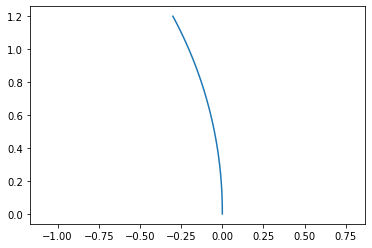

In [52]:
plot_path()

-1.019186533580275 2.516457919273738


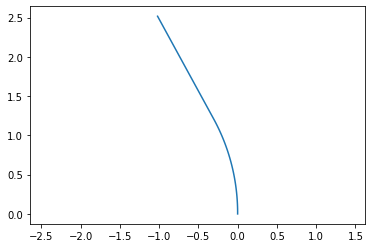

In [53]:
drive(1.5,1.5)
print(position_x(),position_y())
plot_path()

0.4190900822323348 5.14920560494486


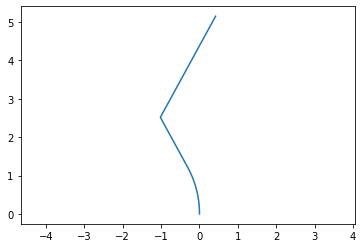

In [54]:
drive(2.5,-2.5)
drive(3,3)
print(position_x(),position_y())
plot_path()